# Outliers Detection

The objective of this notebooks is to demonstrate five different approachs of detecting outliers in our data.

These five methods are:

1. Elliptic Envelope
2. Interquartile Detection
3. Isolation Forest
4. Standard Deviation
5. Z-Score

## Create Sample Data

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

# Deactivate warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [184]:
# Create a random dataset with two features
# Normal distributions dataset

X, _ = make_blobs(n_samples=500, n_features=2, centers=1, shuffle=True, random_state=1)

## Elliptic Envelope

In [185]:
elpenv = EllipticEnvelope(contamination=0.025, random_state=1)
elpenv

EllipticEnvelope(contamination=0.025, random_state=1)

In [186]:
# Returns 1 for inliers and -1 for outliers
pred = elpenv.fit_predict(X)
pred

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [187]:
# Identify the outliers (-1)
outliers_index = np.where(pred==-1)
outliers_values = X[outliers_index]

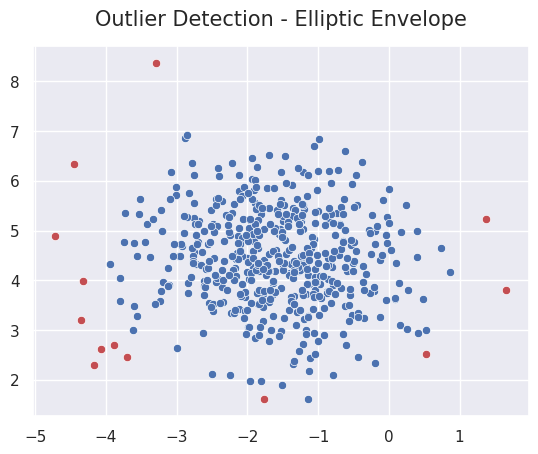

In [188]:
# Plot the data and mark the outliers
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outliers_values[:,0],
                y=outliers_values[:,1], color='r')

plt.title('Outlier Detection - Elliptic Envelope', fontsize=15, pad=15)
plt.show()

## Interquatile Detection

In [189]:
# create dataframe with our random values
df = pd.DataFrame(X, columns=['x', 'y'])
df.head()

,x,y
0,-1.802756,5.439474
1,-2.511016,5.407371
2,-2.465738,4.455552
3,0.531140,2.510129
4,-0.590574,4.196737


In [190]:
# calculate the first and third quartiles of the data
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# calculate the interquartile range (IQR) of the data
IQR = q3 - q1

In [191]:
# calculate the lower and upper bounds for outliers
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
print('lower_limit', lower_limit)
print('upper_limit', upper_limit)

lower_limit x   -3.982804
y    1.755537
dtype: float64
upper_limit x    0.797452
y    7.158055
dtype: float64


In [192]:
df.describe()

,x,y
count,500.000000,500.000000
mean,-1.616350,4.433708
std,0.975404,0.991693
min,-4.713324,1.615493
25%,-2.190208,3.781481
50%,-1.584523,4.412765
75%,-0.995144,5.132111
max,1.661519,8.365093


In [193]:
lower_limit[0]

-3.9828044109547616

In [194]:
# identify the outliers in the data
outliers = df[(df['x'] < lower_limit[0]) | (df['x'] > upper_limit[0]) | (df['y'] < lower_limit[1]) | (df['y'] > upper_limit[1])]

# get the indexes of the outliers
outlier_indexes = outliers.index.tolist()

In [195]:
# create a new column 'color' based on the limits
df['color'] = 'blue'
df.loc[outlier_indexes, 'color'] = 'red'
df['color'].unique()

array(['blue', 'red'], dtype=object)

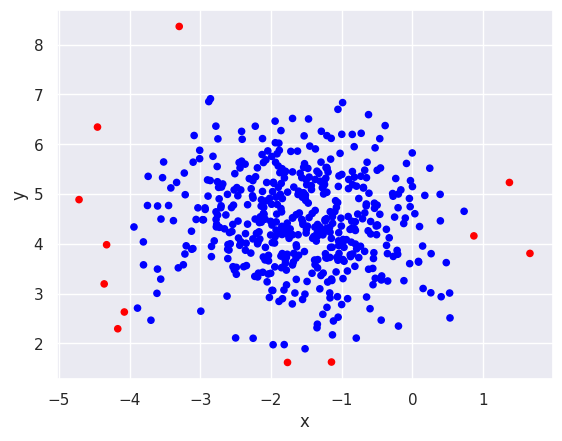

In [196]:
# Plot the data and mark the outliers
df.plot.scatter(x='x', y='y', c=df['color'])
plt.show()

## Isolation Forest

In [197]:
iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=1.0,
                          bootstrap=False, n_jobs=-1, random_state=1)

iforest

IsolationForest(contamination=0.05, n_jobs=-1, random_state=1)

In [198]:
pred = iforest.fit_predict(X)
pred

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [199]:
# Identify the outliers (-1)
outliers_index = np.where(pred==-1)
outliers_values = X[outliers_index]

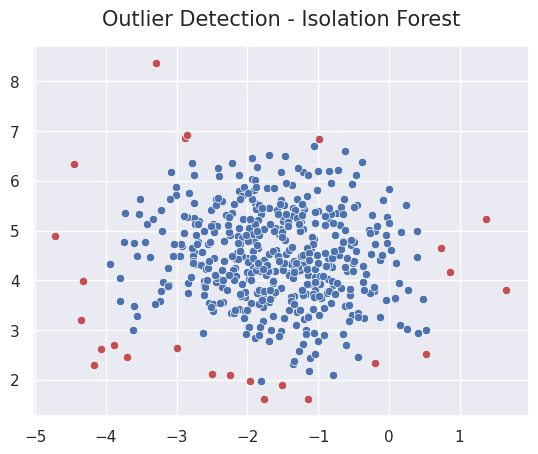

In [200]:
# Plot the data and mark the outliers
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outliers_values[:,0],
                y=outliers_values[:,1], color='r')

plt.title('Outlier Detection - Isolation Forest', fontsize=15, pad=15)
plt.show()

## Standard Deviation

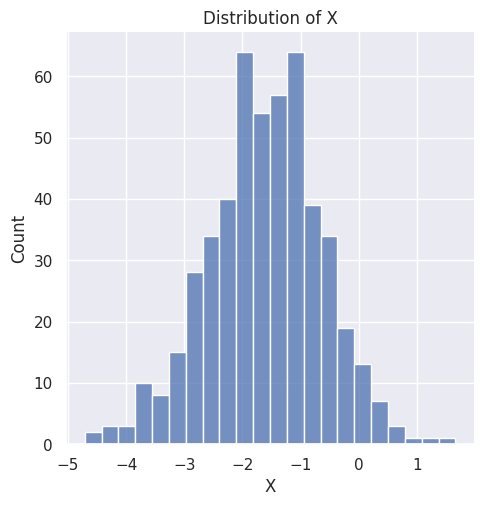

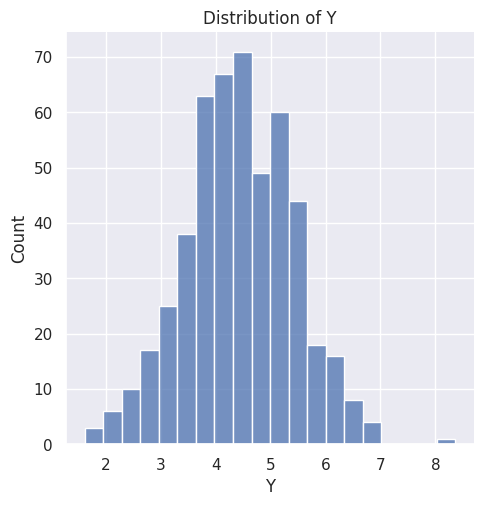

In [204]:
# plot the distribution 'x'
sns.displot(data=df, x='x').set(title='Distribution of X', xlabel='X')

# plot the distribution 'y'
sns.displot(data=df, x='y').set(title='Distribution of Y', xlabel='Y')

plt.show()

In [206]:
# define limits using sigmas, by variable
lower_limit_x = df['x'].mean() - 3*df['x'].std()
upper_limit_x = df['x'].mean() + 3*df['x'].std()

lower_limit_y = df['y'].mean() - 3*df['y'].std()
upper_limit_y = df['y'].mean() + 3*df['y'].std()
print('lower_limit_x : ', lower_limit_x , ' & upper_limit_x : ', upper_limit_x)
print('lower_limit_y : ', lower_limit_y , ' & upper_limit_y : ', upper_limit_y)

lower_limit_x :  -4.542563544002803  & upper_limit_x :  1.3098631716867186
lower_limit_y :  1.4586299437868235  & upper_limit_y :  7.408786924459243


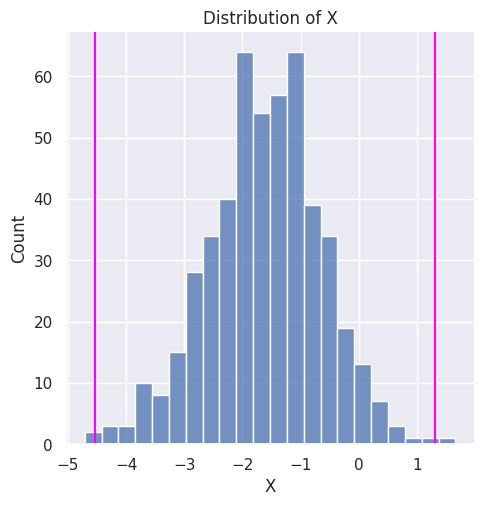

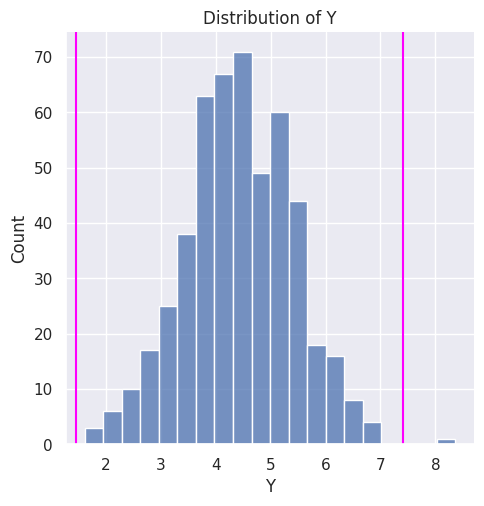

In [212]:
# Plot histograms with the upper and lower limits
# plot the distribution 'x'
fig = sns.displot(data=df, x='x')
fig.set(title='Distribution of X', xlabel='X')
plt.axvline(lower_limit_x, color='magenta')
plt.axvline(upper_limit_x, color='magenta')

# plot the distribution 'y'
fig = sns.displot(data=df, x='y')
fig.set(title='Distribution of Y', xlabel='Y')
plt.axvline(lower_limit_y, color='magenta')
plt.axvline(upper_limit_y, color='magenta')
plt.show()

## Z-Score

In [213]:
# Calculate the Z-score in a new column
df['z_score_x'] = (df['x'] - df['x'].mean())/df['x'].std()
df['z_score_y'] = (df['y'] - df['y'].mean())/df['y'].std()
df.head()

,x,y,color,z_score_x,z_score_y
0,-1.802756,5.439474,blue,-0.191106,1.014190
1,-2.511016,5.407371,blue,-0.917225,0.981819
2,-2.465738,4.455552,blue,-0.870806,0.022026
3,0.531140,2.510129,blue,2.201641,-1.939693
4,-0.590574,4.196737,blue,1.051642,-0.238957


In [216]:
# Identify the outlier then assign a color
# identify the outliers in the data
outliers_z = df[(df['z_score_x'] < -3) | (df['z_score_x'] > 3) | (df['z_score_y'] < -3) | (df['z_score_y'] > 3)]

# get the indexes of the outliers
outlier_indexes_z = outliers_z.index.tolist()

In [217]:
# create a new column 'color_z' based on the limits
df['color_z'] = 'blue'
df.loc[outlier_indexes_z, 'color_z'] = 'red'
df['color_z'].unique()

array(['blue', 'red'], dtype=object)

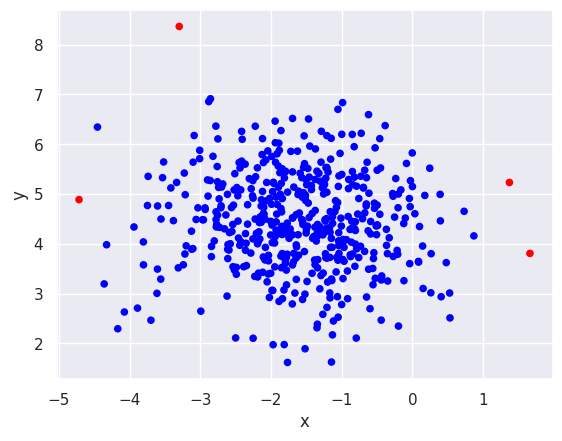

In [218]:
# Plot the data and mark the outliers
df.plot.scatter(x='x', y='y', c=df['color_z'])
plt.show()